In [1]:
import matplotlib
import pandas as pd


In [2]:
data=pd.read_csv('./Disease_symptom_and_patient_profile_dataset.csv',header=0)
data=data.dropna()
data.columns=[column.replace(' ','_') for column in data.columns ]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty_Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood_Pressure        349 non-null    object
 8   Cholesterol_Level     349 non-null    object
 9   Outcome_Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 30.0+ KB


In [4]:
data.head()

,Disease,Fever,Cough,Fatigue,Difficulty_Breathing,Age,Gender,Blood_Pressure,Cholesterol_Level,Outcome_Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [5]:
# one-hot
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in data.select_dtypes(include=['object']).columns:
    data[column]=label_encoder.fit_transform(data[column])


In [6]:
x=data.drop('Outcome_Variable',axis=1)
y=data['Outcome_Variable']


In [16]:
import numpy as np

class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X.to_numpy()
        self.y_train = y.to_numpy()

    def predict(self, X):
        X=X.to_numpy()
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
k=data['Disease'].unique().size

sklearnClassifier =KNeighborsClassifier(k)
sklearnClassifier.fit(x_train,y_train)
y_predict=sklearnClassifier.predict(x_test)
score=accuracy_score(y_test,y_predict)
print("Sci-kit learn Knn classifier score:",score)

Sci-kit learn Knn classifier score: 0.5047619047619047


In [41]:

myclassifier =KNNClassifier(int(k/2))
myclassifier.fit(x_train,y_train)
y_predict=myclassifier.predict(x_test)
score=accuracy_score(y_test,y_predict)
print("MY Knn classifier' score: ",score)

MY Knn classifier' score:  0.580952380952381


0.580952380952381

In [ ]:
from sklearn.model_selection import train_test_split
X=data.drop('')

x_train, x_test, y_train, y_test=train_test_split()



In [46]:
from sklearn.metrics import roc_curve, roc_auc_score,RocCurveDisplay
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
auc = roc_auc_score(y_test, y_predict)

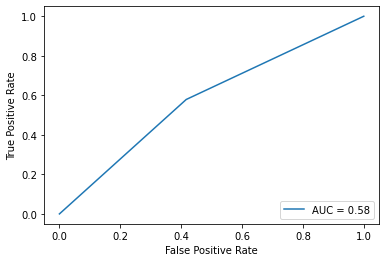

In [48]:
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc,
                                   )
display.plot()
plt.show()